## Photometry

In this notebook, you will learn to count photons from a target source and determine its magnitude.

Requisites:
* a working Python 3.x environment, with **Astropy** (4.0), **Matplotlib** (3.1), and **NumPy** (1.18) installed;
* a ```utils.py``` file with useful functions;
* a (set of) reduced science frame(s) (e.g. ```sci_2015/Reduced-001(NNN).fits```).

### A bullseye on our star

Let's start from our reduced science frame, and highlight the pixel with the highest ADU value (we are lucky that it is on our star!):

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
from utils import *


sci = fits.open('sci_2015/Reduced-001.fits')[0]
x_max, y_max = extrema(sci.data)

plot_img_medrange(sci.data)
plt.scatter(x_max, y_max)
plt.show()

<Figure size 1200x800 with 2 Axes>

It's better to consider just a limited region around the star:

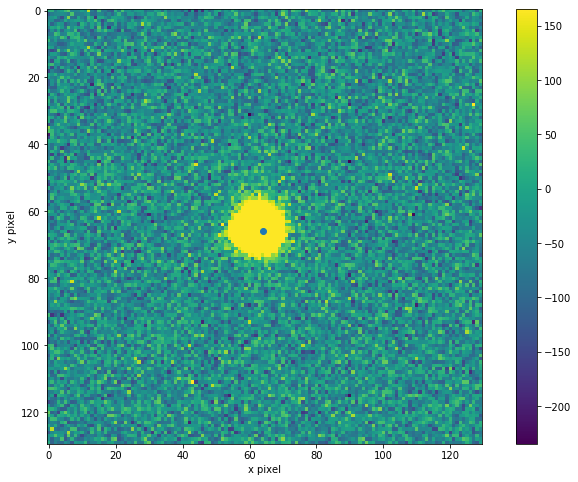

In [2]:
import numpy as np

reg = np.s_[250:380,400:530]
sub_img = sci.data[reg]
x_max, y_max = extrema(sub_img)

plot_img_medrange(sub_img)
plt.scatter(x_max, y_max)
plt.show()

The simplest way to cut out our source is to draw a **square mask** around it. We can use ```ogrid``` to obtain row and column indexes re-centered on the red spot:

In [3]:
shape = sub_img.shape
rows, cols = np.ogrid[-y_max:shape[0]-y_max, -x_max:shape[1]-x_max]
print(rows)
print(cols)

[[-66]
 [-65]
 [-64]
 [-63]
 [-62]
 [-61]
 [-60]
 [-59]
 [-58]
 [-57]
 [-56]
 [-55]
 [-54]
 [-53]
 [-52]
 [-51]
 [-50]
 [-49]
 [-48]
 [-47]
 [-46]
 [-45]
 [-44]
 [-43]
 [-42]
 [-41]
 [-40]
 [-39]
 [-38]
 [-37]
 [-36]
 [-35]
 [-34]
 [-33]
 [-32]
 [-31]
 [-30]
 [-29]
 [-28]
 [-27]
 [-26]
 [-25]
 [-24]
 [-23]
 [-22]
 [-21]
 [-20]
 [-19]
 [-18]
 [-17]
 [-16]
 [-15]
 [-14]
 [-13]
 [-12]
 [-11]
 [-10]
 [ -9]
 [ -8]
 [ -7]
 [ -6]
 [ -5]
 [ -4]
 [ -3]
 [ -2]
 [ -1]
 [  0]
 [  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [  6]
 [  7]
 [  8]
 [  9]
 [ 10]
 [ 11]
 [ 12]
 [ 13]
 [ 14]
 [ 15]
 [ 16]
 [ 17]
 [ 18]
 [ 19]
 [ 20]
 [ 21]
 [ 22]
 [ 23]
 [ 24]
 [ 25]
 [ 26]
 [ 27]
 [ 28]
 [ 29]
 [ 30]
 [ 31]
 [ 32]
 [ 33]
 [ 34]
 [ 35]
 [ 36]
 [ 37]
 [ 38]
 [ 39]
 [ 40]
 [ 41]
 [ 42]
 [ 43]
 [ 44]
 [ 45]
 [ 46]
 [ 47]
 [ 48]
 [ 49]
 [ 50]
 [ 51]
 [ 52]
 [ 53]
 [ 54]
 [ 55]
 [ 56]
 [ 57]
 [ 58]
 [ 59]
 [ 60]
 [ 61]
 [ 62]
 [ 63]]
[[-64 -63 -62 -61 -60 -59 -58 -57 -56 -55 -54 -53 -52 -51 -50 -49 -48 -47
  -46 -45 -44 -

The square mask is then defined by selecting the rows and columns whose re-centered indexes do no exceed some given threshold:

In [4]:
thr=10
mask = np.logical_and(np.abs(rows)<thr, np.abs(cols)<thr)
print(mask)
print(np.where(mask==True))

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
(array([57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
       57, 57, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58,
       58, 58, 58, 58, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59,
       59, 59, 59, 59, 59, 59, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60,
       60, 60, 60, 60, 60, 60, 60, 60, 61, 61, 61, 61, 61, 61, 61, 61, 61,
       61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 62, 62, 62, 62, 62, 62, 62,
       62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63,
       63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 64, 64, 64,
       64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 65,
       65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 6

One way to apply the mask is to selectively set to NaN all the pixels of the image where the mask is ```False``` or ```True```. Before doing that, we must create copies of the image, otherwise the information in the masked pixels will be lost:

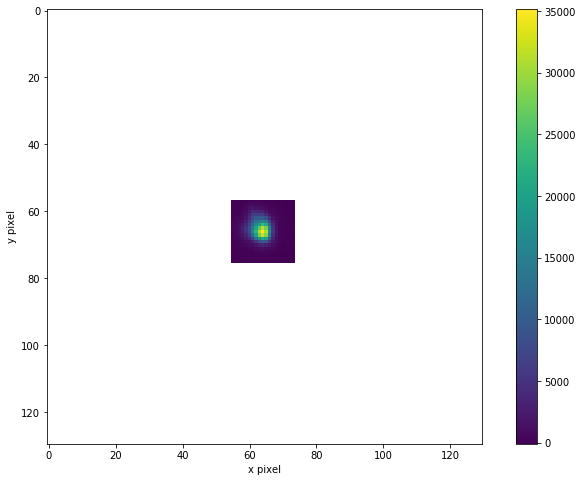

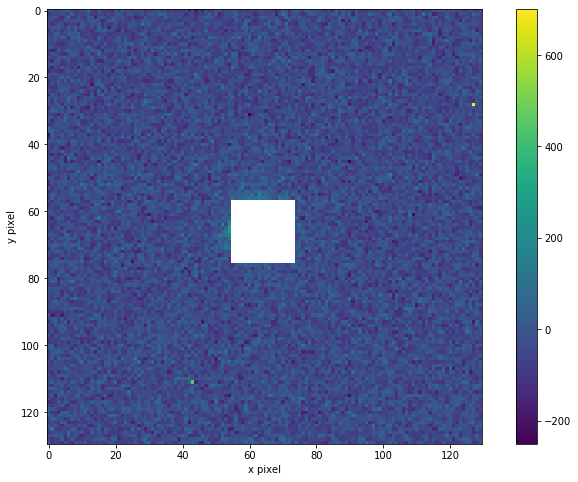

In [5]:
inside = np.copy(sub_img)
outside = np.copy(sub_img)

inside[~mask] = np.nan
outside[mask] = np.nan

plot_img(inside)
plot_img(outside)
plt.show()

> **Your turn now**: repeat the procedure with a **circular mask** instead of a square one. *Hint*: look at the condition used to define the square and convert it into a condition to define a circle.  

### There's something in the background

The ```inside``` and ```outside``` cut-outs reveal a very different distribution of ADU values. The ```outside``` readings, in particular, are more-or-less gaussianly distributed around a central value:

/Users/guido/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/guido/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


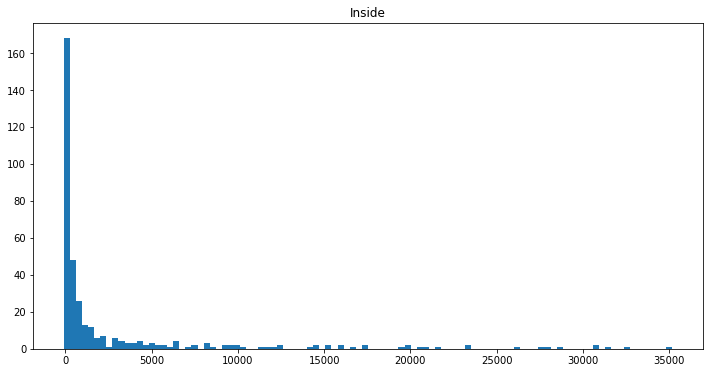

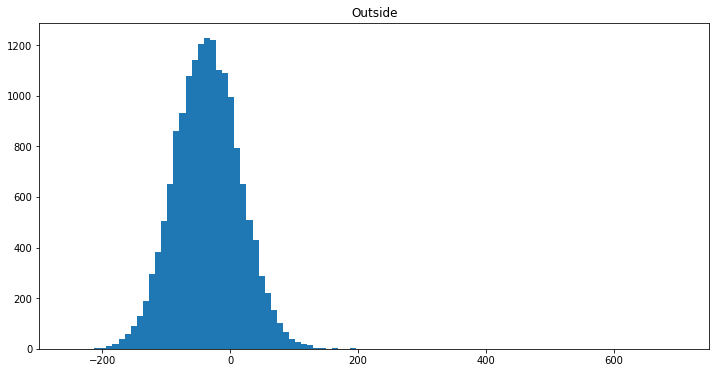

In [6]:
plt.figure(figsize=(12,6))
plt.hist(np.ravel(inside), bins=100)
plt.title('Inside')

plt.figure(figsize=(12,6))
plt.hist(np.ravel(outside), bins=100)
plt.title('Outside')

plt.show()

We take the mean of the distribution as an estimate of the **background**, and subtract it from the ```inside``` cut-out. Note that this value is negative, as we previously over-subtracted the bias (see ```reduction.ipynb```). To compute the mean and the standard deviation, we use ```nanmean``` and ```nanstd```, to properly reject NaN values in the arrays:

In [7]:
outside_mean = np.nanmean(outside)
outside_std = np.nanstd(outside)

gain = 0.6  # ph/ADU
bkg = outside_mean*gain
bkg_noise = outside_std*gain
print("Background: %2.1f+/-%2.1f ph" % (bkg, bkg_noise))

Background: -21.3+/-30.7 ph


### Counting photons

The flux image is obtained by subtracting the background from the ```inside``` cut–out and removing the region with NaN values. We also convert it into photons:

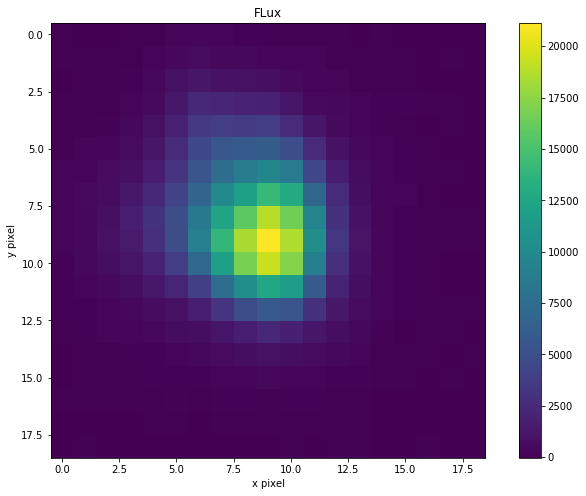

Peak: 2.11e+04, median: 2.17e+02


In [8]:
inside_bkgsub = inside-outside_mean

inside_nonan = inside_bkgsub[~np.isnan(inside_bkgsub)]
size = int(np.sqrt(len(inside_nonan)))
flux = inside_nonan.reshape(size, size)*gain

plot_img(flux)
plt.title('FLux')
plt.show()
print("Peak: %2.2e, median: %2.2e" % (np.max(flux), np.median(flux)))

The error image is obtained as the root sum squared of the photon shot noise, the RON (see ```reduction.ipynb```), and the background noise:

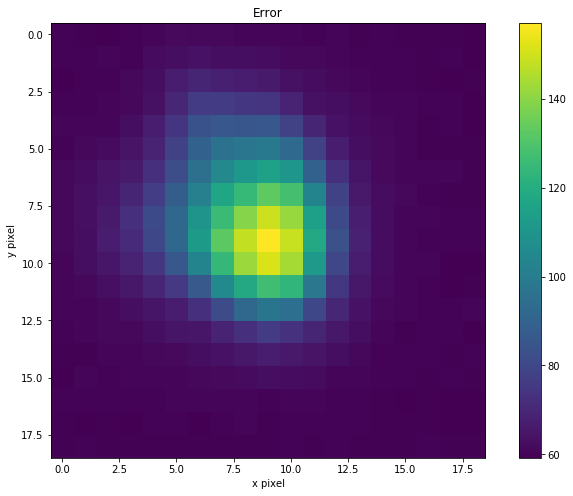

Peak: 1.57e+02, median: 6.13e+01 ph


In [40]:
ron = 28.8  # ph
error = np.sqrt(flux + 2*ron**2 + 2*bkg_noise**2)

plot_img(error)
plt.title('Error')
plt.show()
print("Peak: %2.2e ph, median: %2.2e ph" % (np.max(error), np.median(error)))

The factor of 2 for the background noise is actually too pessimistic. Normally, it reflects the fact that the noise is first added and then subtracted from our signal, but in this case we used a much larger area on the detector to estimate and subtract it, so this second contribution scales as the ratio between the number of pixels inside and outside the mask:

In [23]:
subtr_fact = np.sum(mask)/np.sum(~mask)
subtr_fact

0.021827196323840618

So, a more accurate propagation of the error gives:

In [41]:
error = np.sqrt(flux + 2*ron**2 + (1+subtr_fact)*bkg_noise**2)
print("Peak: %2.2e ph, median: %2.2e ph" % (np.max(error), np.median(error)))

Peak: 1.54e+02 ph, median: 5.33e+01 ph


The **signal-to-noise ratio** (SNR) is then:

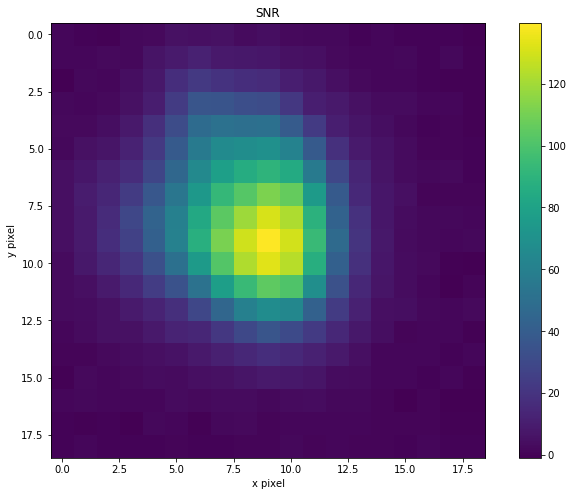

Peak: 1.40e+02, median: 4.87e+00


In [10]:
snr = flux/error

plot_img(snr)
plt.title('SNR')
plt.show()
print("Peak: %2.2e, median: %2.2e" % (np.max(snr), np.median(snr)))

N.B.: These are values **per pixel**; if we want to average them across the square, we must be careful to multiply the RON and the background noise by the number of pixels:

In [38]:
flux_total = np.sum(flux)
error_total = np.sqrt(np.sum(flux) + 2*ron**2*flux.size + (1+subtr_fact)*bkg_noise**2*flux.size)
snr_total = flux_total/error_total

print("Flux: %2.2e+/-%2.2e ph" % (flux_total, error_total))
print("SNR: %2.2e" % snr_total)

Flux: 6.32e+05+/-1.26e+03 ph
SNR: 5.03e+02


> **Your turn now**: use ```ogrid``` to design a circular mask for the target and an annular mask for the background, and use it to perform photometry on SZ Lyn. Compare the SNR you obtain in this case with the one obtained with a square mask.